In [1]:
import pickle

In [2]:
ground_truth_y_file_name='Y_trainingAll.p'

In [3]:
ground_truth_y_file=pickle.load(open(ground_truth_y_file_name, "rb"))

In [4]:
ground_truth_x_file_name='X_trainingAll.p'

In [5]:
ground_truth_x_file=pickle.load(open(ground_truth_x_file_name, "rb"))

In [6]:
import numpy as np

features_list = [feature for feature in ground_truth_x_file]
targets_list = [feature for feature in ground_truth_y_file]
Numsamples = len(ground_truth_x_file[features_list[0]])
Numfeatures = len(ground_truth_x_file)
Numtargets = len(ground_truth_y_file)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = ground_truth_x_file[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = ground_truth_y_file[targets_list[j]][i][0]

ground_truth_x_file = x_data
ground_truth_y_file = y_data

In [7]:
ground_truth_y_file = ground_truth_y_file[:,~np.all(ground_truth_y_file == 0, axis=0)]

In [8]:
ground_truth_x_file.shape,ground_truth_y_file.shape

((86, 6), (86, 5))

In [9]:
#now, I need to select the data
print('the max emittance before cleaning data is',max(ground_truth_y_file[:,0]))
print('the min emittance before cleaning data is',min(ground_truth_y_file[:,0]))

the max emittance before cleaning data is 1.6689109037483907
the min emittance before cleaning data is 0.16479332865961996


In [10]:
max_allowed_emittance = 1

In [11]:
targets_list = new_targets_list

In [12]:
#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(ground_truth_y_file[:, features_index])
    std = np.std(ground_truth_y_file[:, features_index])
    
    for index in range(0, ground_truth_y_file.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if ground_truth_y_file[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    
    ground_truth_x_file = ground_truth_x_file[keep_index, :]
    ground_truth_y_file = ground_truth_y_file[keep_index, :]

In [13]:
ground_truth_x_file.shape,ground_truth_y_file.shape

((78, 6), (78, 5))

In [14]:
print('the max emittance before cleaning data is',max(ground_truth_y_file[:,0]))
print('the min emittance before cleaning data is',min(ground_truth_y_file[:,0]))

the max emittance before cleaning data is 0.9145046369611117
the min emittance before cleaning data is 0.16479332865961996


In [15]:
ml_x_file_name='gpt_run_callback_combine_X.p'
ml_y_file_name='gpt_run_callback_combine_Y.p'

In [16]:
ml_y_file=pickle.load(open(ml_y_file_name, "rb"))
ml_x_file=pickle.load(open(ml_x_file_name, "rb"))

In [17]:
import numpy as np

features_list = [feature for feature in ml_x_file]
targets_list = [feature for feature in ml_y_file]
Numsamples = len(ml_x_file[features_list[0]])
Numfeatures = len(ml_x_file)
Numtargets = len(ml_y_file)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = ml_x_file[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = ml_y_file[targets_list[j]][i][0]

ml_x_file = x_data
ml_y_file = y_data

In [18]:
ml_y_file = ml_y_file[:,~np.all(ml_y_file == 0, axis=0)]

In [19]:
ml_x_file.shape,ml_y_file.shape

((78, 6), (78, 5))

In [21]:
check_index=20

In [22]:
ground_truth_y_file[check_index,:]

array([  0.24796261, -30.03829681,  43.88342675, -13.61750744,
        98.9086375 ])

In [23]:
ml_y_file[check_index,:]

array([  0.54642578, -32.69736055,  46.90046558, -14.86595943,
       105.69180114])

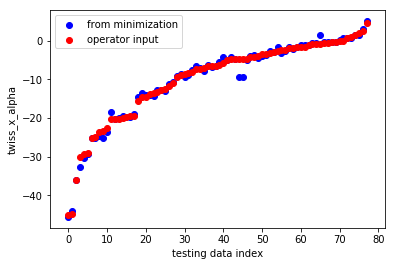

In [33]:
import matplotlib.pyplot as plt

x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,1])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 
plt.scatter(x_axis,ml_y_file[:,1],c='b',label='from minimization')
plt.scatter(x_axis,ground_truth_y_file[:,1],c='r',label='operator input')

plt.ylabel('twiss_x_alpha')
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [40]:
diff=ground_truth_y_file-ml_y_file
diff=diff[:,0]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/ground_truth_y_file.shape[0]
diff

0.24850012480314654

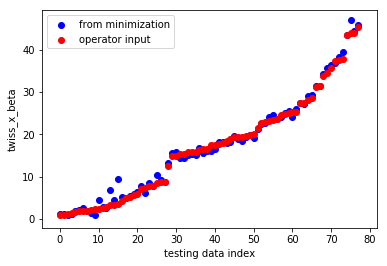

In [35]:
x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,2])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 
plt.scatter(x_axis,ml_y_file[:,2],c='b',label='from minimization')
plt.scatter(x_axis,ground_truth_y_file[:,2],c='r',label='operator input')


plt.ylabel('twiss_x_beta')
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [41]:
diff=ground_truth_y_file-ml_y_file
diff=diff[:,1]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/ground_truth_y_file.shape[0]
diff

0.6134752318095335

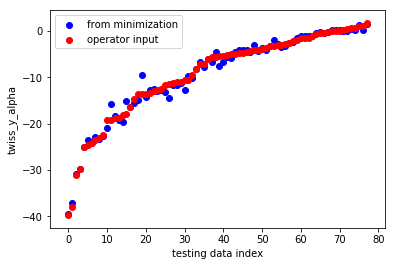

In [39]:
x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,3])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 
    
plt.scatter(x_axis,ml_y_file[:,3],c='b',label='from minimization')
plt.scatter(x_axis,ground_truth_y_file[:,3],c='r',label='operator input')


plt.ylabel('twiss_y_alpha')
plt.xlabel('testing data index')
plt.legend(loc='upper left')


plt.show()

In [42]:
diff=ground_truth_y_file-ml_y_file
diff=diff[:,2]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/ground_truth_y_file.shape[0]
diff

0.7267340865697484

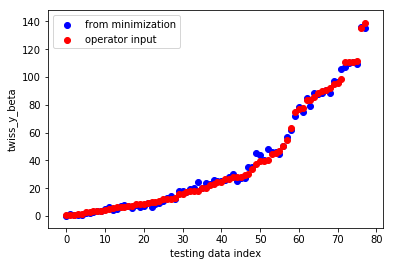

In [38]:
x_axis=[]
for index in range(0,ground_truth_y_file.shape[0]):
    x_axis.append(index)

sort_index=np.argsort(ground_truth_y_file[:,4])
ground_truth_y_file=ground_truth_y_file[sort_index,:]
ml_y_file=ml_y_file[sort_index,:]
 
plt.scatter(x_axis,ml_y_file[:,4],c='b',label='from minimization')
plt.scatter(x_axis,ground_truth_y_file[:,4],c='r',label='operator input')


plt.ylabel('twiss_y_beta')
plt.xlabel('testing data index')
plt.legend(loc='upper left')


plt.show()

In [44]:
diff=ground_truth_y_file-ml_y_file
diff=diff[:,3]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/ground_truth_y_file.shape[0]
diff

0.6688170921633018

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import load_model
from keras.regularizers import l2

/Users/zuhaohua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
model_1= Sequential()
model_1.add(Dense(64, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_1.add(Dense(64, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(32, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(32, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(4, activation='linear',activity_regularizer=l2(0.00)))
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [31]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 68        
Total para